In [ ]:
import pandas as pd
housing=pd.read_csv("Book1.csv")
housing.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [ ]:
housing.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

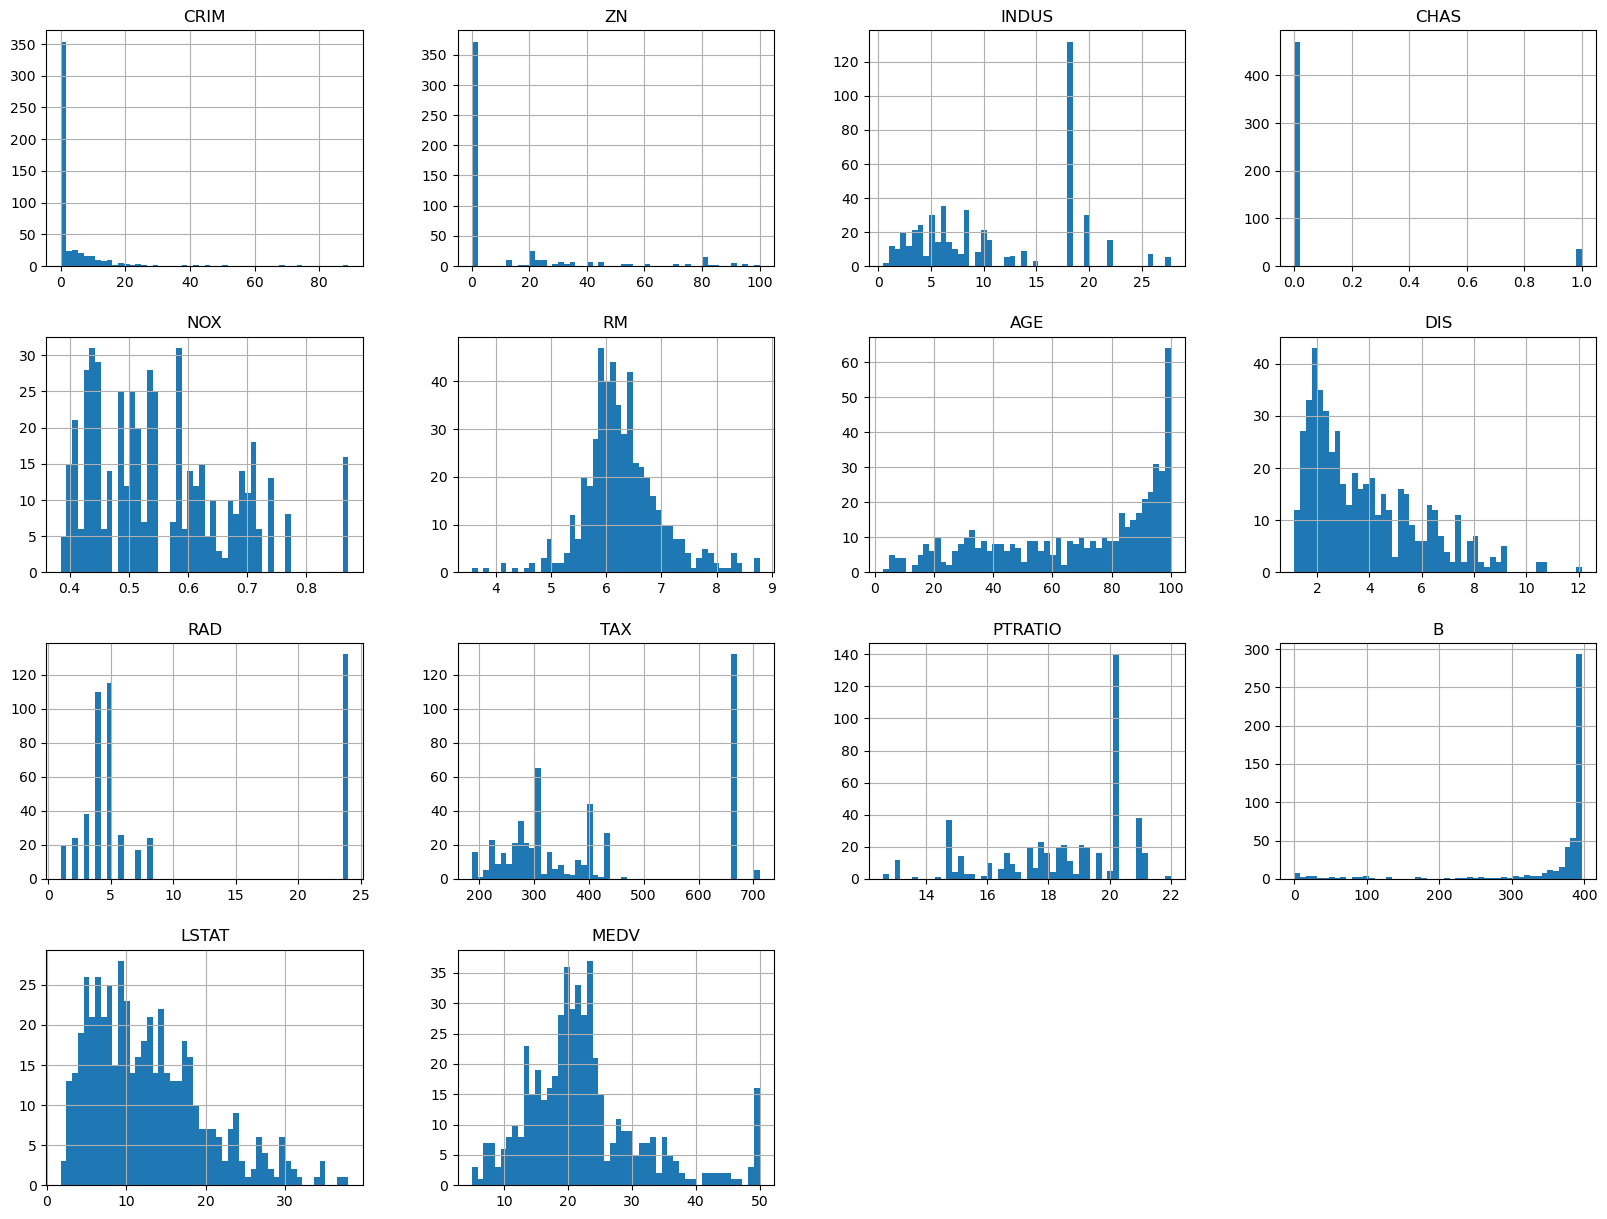

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))

In [ ]:
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled=np.random.permutation(len(data))
    print(shuffled)
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [ ]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print(f"Rows in train set:{len(train_set)}\nRows in test size:{len(test_set)}\n")

Rows in train set:404
Rows in test size:102



In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [ ]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [ ]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [1]:
corr_matrix=housing.corr()

NameError: ignored

In [ ]:
corr_matrix['MEDV'].sort_values(ascending =False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

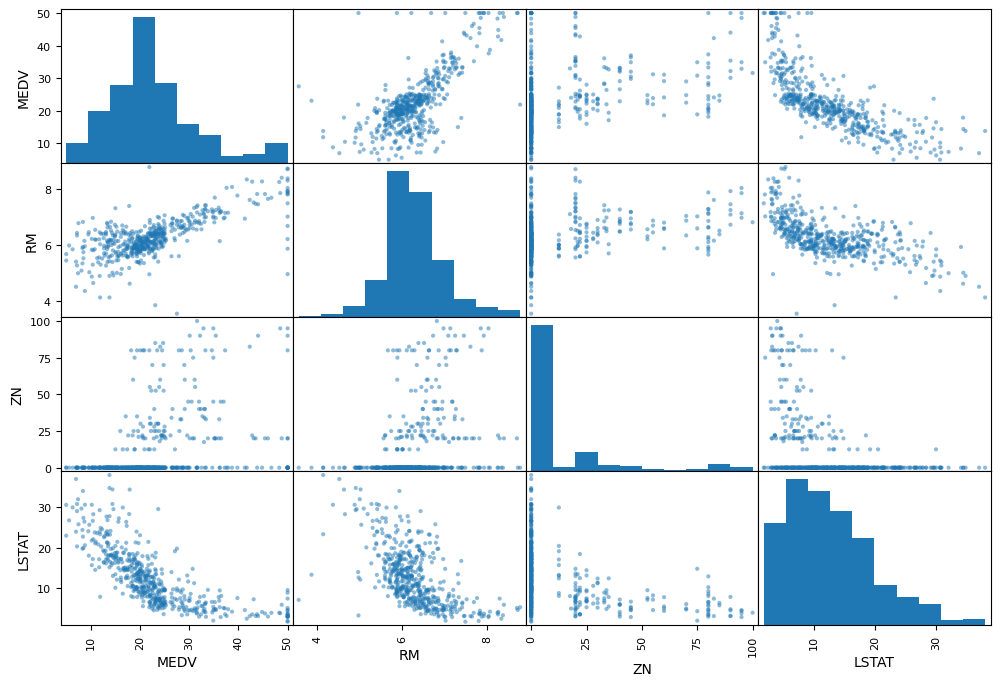

In [ ]:
from pandas.plotting import scatter_matrix
attributes=["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

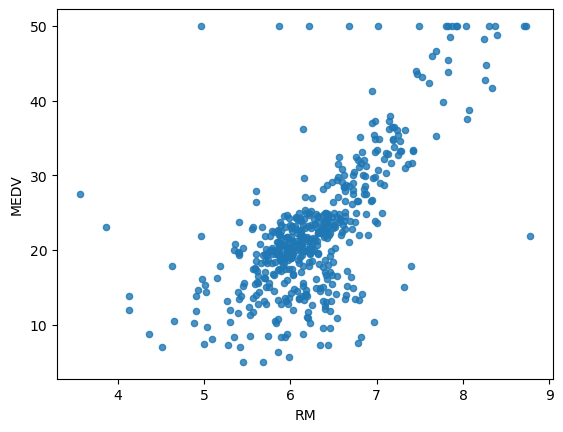

In [ ]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)

In [ ]:
housing["TAXRM"]=housing["TAX"]/housing["RM"]

In [ ]:
housing.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV      TAXRM  
0  396.90   4.98  24.0  45.019011  
1  396.90   9.14  21.6  37.688834  
2  392.83   4.03  34.7  33.681280  
3  394.63   2.94  33.4  31.723350  
4  396.90   5.33  36.2  31.061984

In [ ]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
TAXRM     -0.537650
LSTAT     -0.737663
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

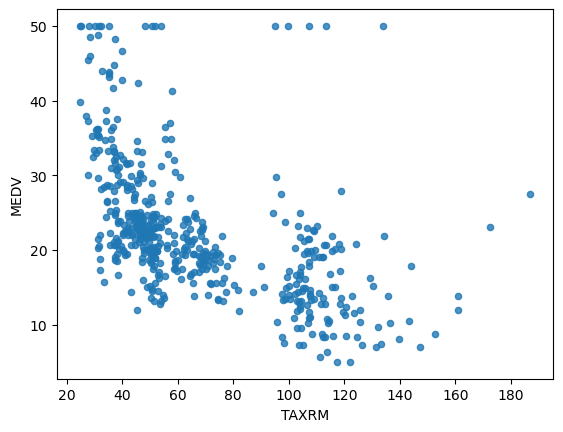

In [ ]:
housing.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.8)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
housing = pd.read_csv("Book1.csv",encoding='ISO-8859-1')

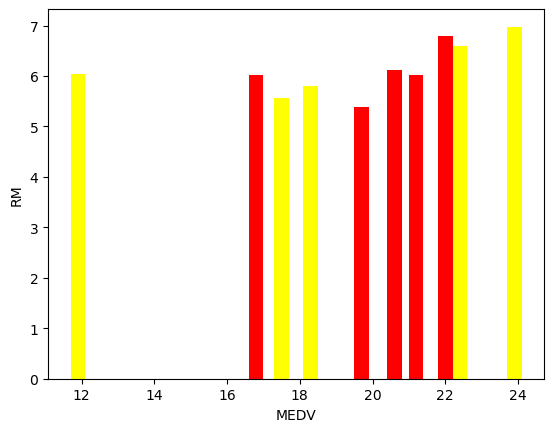

In [ ]:
housing= housing.tail(10)
x=housing["MEDV"]
y=housing["RM"]
plt.bar(x,y, color=["red","yellow"],width=0.4)
plt.xlabel("MEDV")
plt.ylabel("RM")
plt.show()

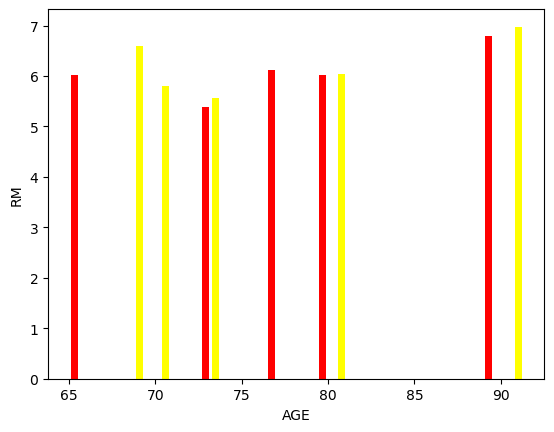

In [ ]:
housing= housing.tail(10)
x=housing["AGE"]
y=housing["RM"]
plt.bar(x,y, color=["red","yellow"],width=0.4)
plt.xlabel("AGE")
plt.ylabel("RM")
plt.show()

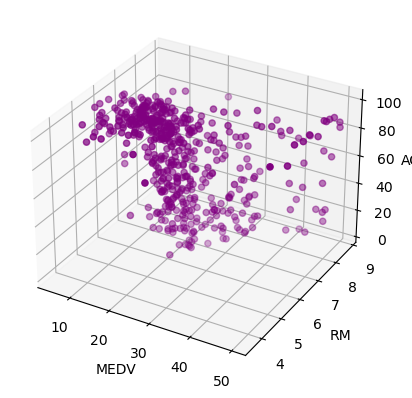

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
housing=pd.read_csv("Book1.csv")
x=housing["MEDV"]
y=housing["RM"]
z=housing["AGE"]
f=plt.figure()
a=f.add_subplot(111, projection="3d")
a.scatter(x,y,z, color="purple")
a.set_xlabel("MEDV")
a.set_ylabel("RM")
a.set_zlabel("AGE")
plt.show()

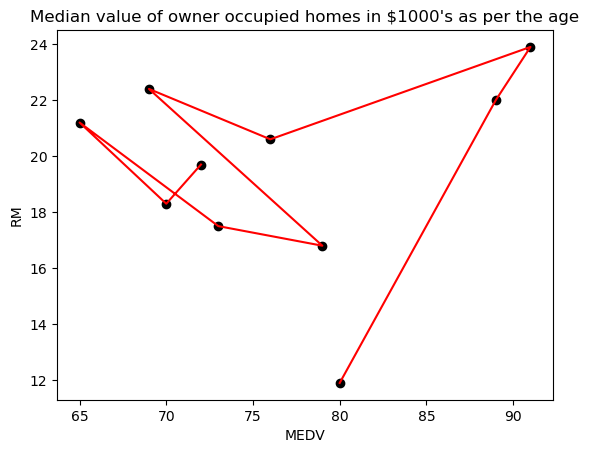

In [ ]:
housing= housing.tail(10)
X=housing["AGE"]
x=[int(i) for i in X]
Y=housing["MEDV"]
s=[float(i) for i in Y]
plt.plot(x,s, color="red")
plt.scatter(x,s, color="black")
plt.xlabel("MEDV")
plt.ylabel("RM")
plt.title("Median value of owner occupied homes in $1000's as per the age")
plt.show()

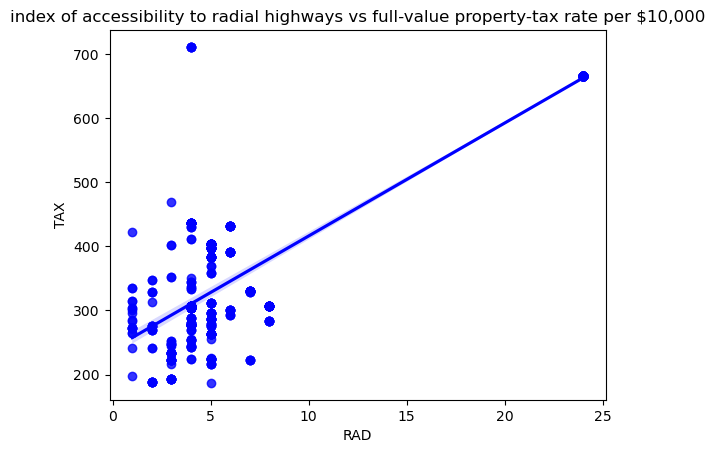

In [ ]:
import pandas as pd
import seaborn as sns
housing=pd.read_csv("Book1.csv")
x=("RAD")
y=("TAX")
x_data=housing[x]
y_data=housing[y]
sns.regplot(x=x_data, y=y_data, color="blue")
plt.title("index of accessibility to radial highways vs full-value property-tax rate per $10,000")
plt.xlabel("RAD")
plt.ylabel("TAX")
plt.show()

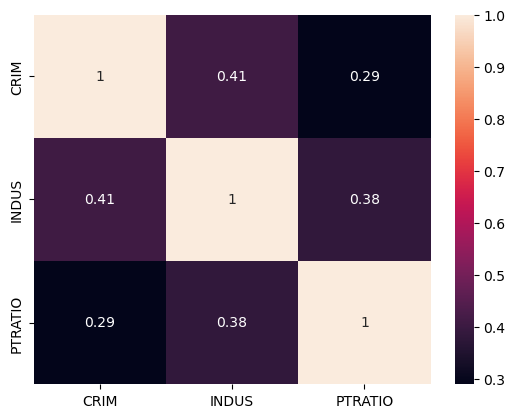

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
housing=pd.read_csv("Book1.csv")
cols=["CRIM","INDUS","PTRATIO"]
corr_matrix=housing[cols].corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

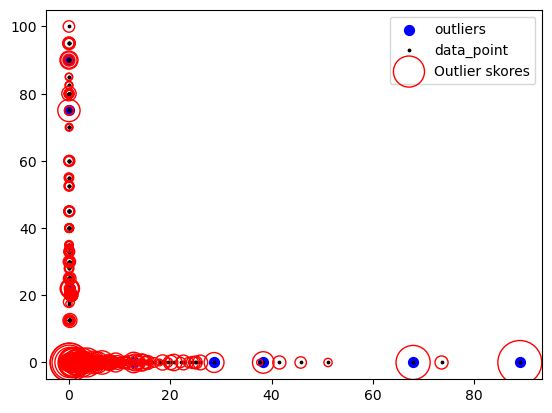

In [ ]:
x=housing.drop(['RM'],axis=1)
y=housing.RM
columns=x.columns.tolist()

clf=LocalOutlierFactor()
y_pred=clf.fit_predict(x)
x_score=clf.negative_outlier_factor_
outlier_score=pd.DataFrame()
outlier_score['MEDV']=x_score
threshold_outliers=-1.5
filters=outlier_score['MEDV']<threshold_outliers
outlier_index=outlier_score[filters].index.tolist()

plt.figure()
plt.scatter(x.iloc[outlier_index,0],x.iloc[outlier_index,1],color='blue',s=50,label='outliers')
plt.scatter(x.iloc[:,0]
           ,x.iloc[:,1],color='k',s=3,label='data_point')
radius=(x_score.max()-x_score)/(x_score.max()-x_score.min())
outlier_score['AGE']=radius
plt.scatter(x.iloc[:,0],x.iloc[:,1],s=1000*radius,edgecolors='r',facecolor='none',label='Outlier skores')
plt.legend()
plt.show();

In [ ]:
x=x.drop(outlier_index)
y=y.drop(outlier_index).values

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score





In [ ]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[-0.45631473,  0.25892103, -1.2603441 , ...,  0.40368627,
        -1.04887797,  0.14118764],
       [-0.45337238, -0.50392744, -0.55077336, ...,  0.40368627,
        -0.45948629, -0.12681008],
       [-0.45337518, -0.50392744, -0.55077336, ...,  0.35836577,
        -1.18347463,  1.3360108 ],
       ...,
       [-0.44868339, -0.50392744,  0.17370434, ...,  0.40368627,
        -0.95536871,  0.13002107],
       [-0.44183845, -0.50392744,  0.17370434, ...,  0.36526963,
        -0.83635693, -0.08214379],
       [-0.45055478, -0.50392744,  0.17370434, ...,  0.40368627,
        -0.63800396, -1.20996752]])

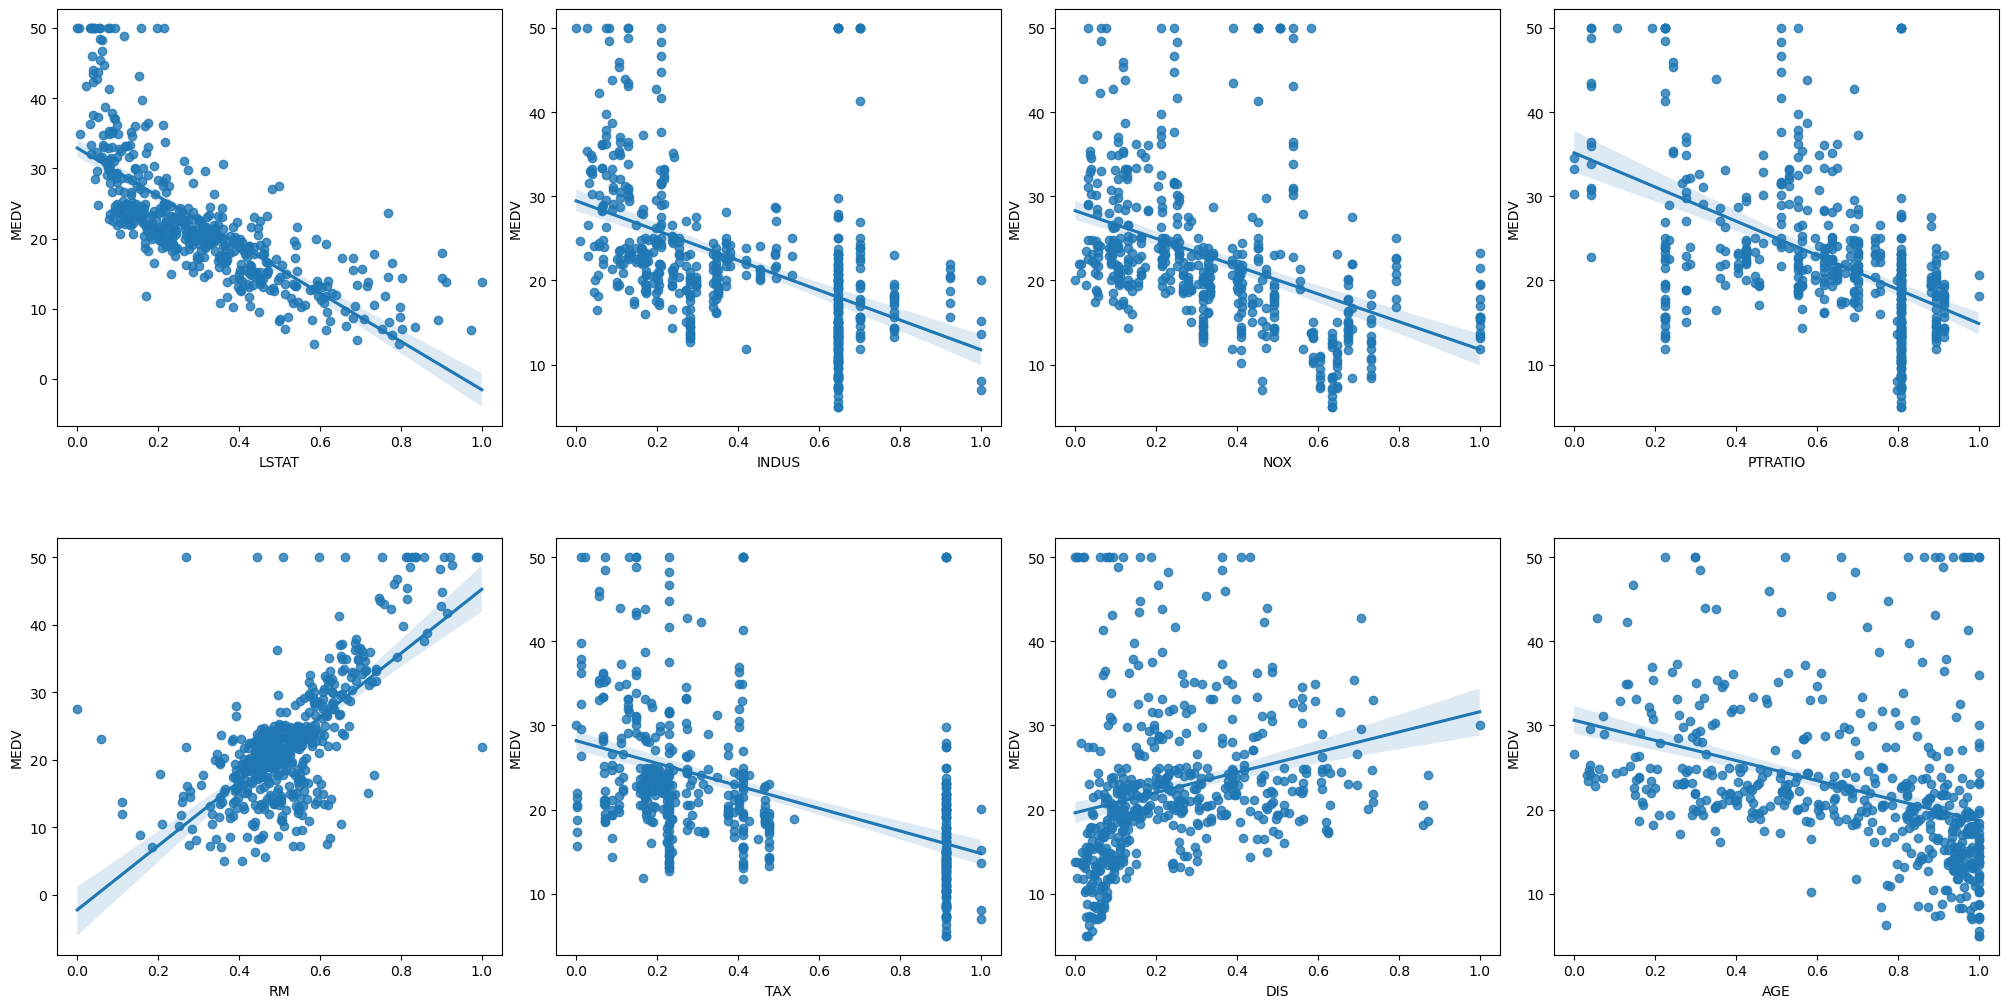

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = housing.loc[:,column_sels]
y = housing['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np

l_regression = linear_model.LinearRegression()
kf = KFold(n_splits=10)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scores = cross_val_score(l_regression, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores_map = {}
scores_map['LinearRegression'] = scores
l_ridge = linear_model.Ridge()
scores = cross_val_score(l_ridge, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['Ridge'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

# Lets try polinomial regression with L2 with degree for the best fit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

model = make_pipeline(PolynomialFeatures(degree=3), linear_model.Ridge())
scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['PolyRidge'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -34.94 (+/- 44.59)
MSE: -32.56 (+/- 38.72)
MSE: -21.33 (+/- 25.77)


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

scores = cross_val_score(svr_rbf, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['SVR'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -20.15 (+/- 26.16)


In [ ]:
from sklearn.tree import DecisionTreeRegressor

desc_tr = DecisionTreeRegressor(max_depth=5)

scores = cross_val_score(desc_tr, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['DecisionTreeRegressor'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -35.36 (+/- 29.81)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=7)
scores = cross_val_score(knn, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['KNeighborsRegressor'] = scores
print("KNN Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

KNN Accuracy: -33.70 (+/- 30.99)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, random_state=30)
scores = cross_val_score(gbr, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['GradientBoostingRegressor'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -19.39 (+/- 23.88)


<Axes: >

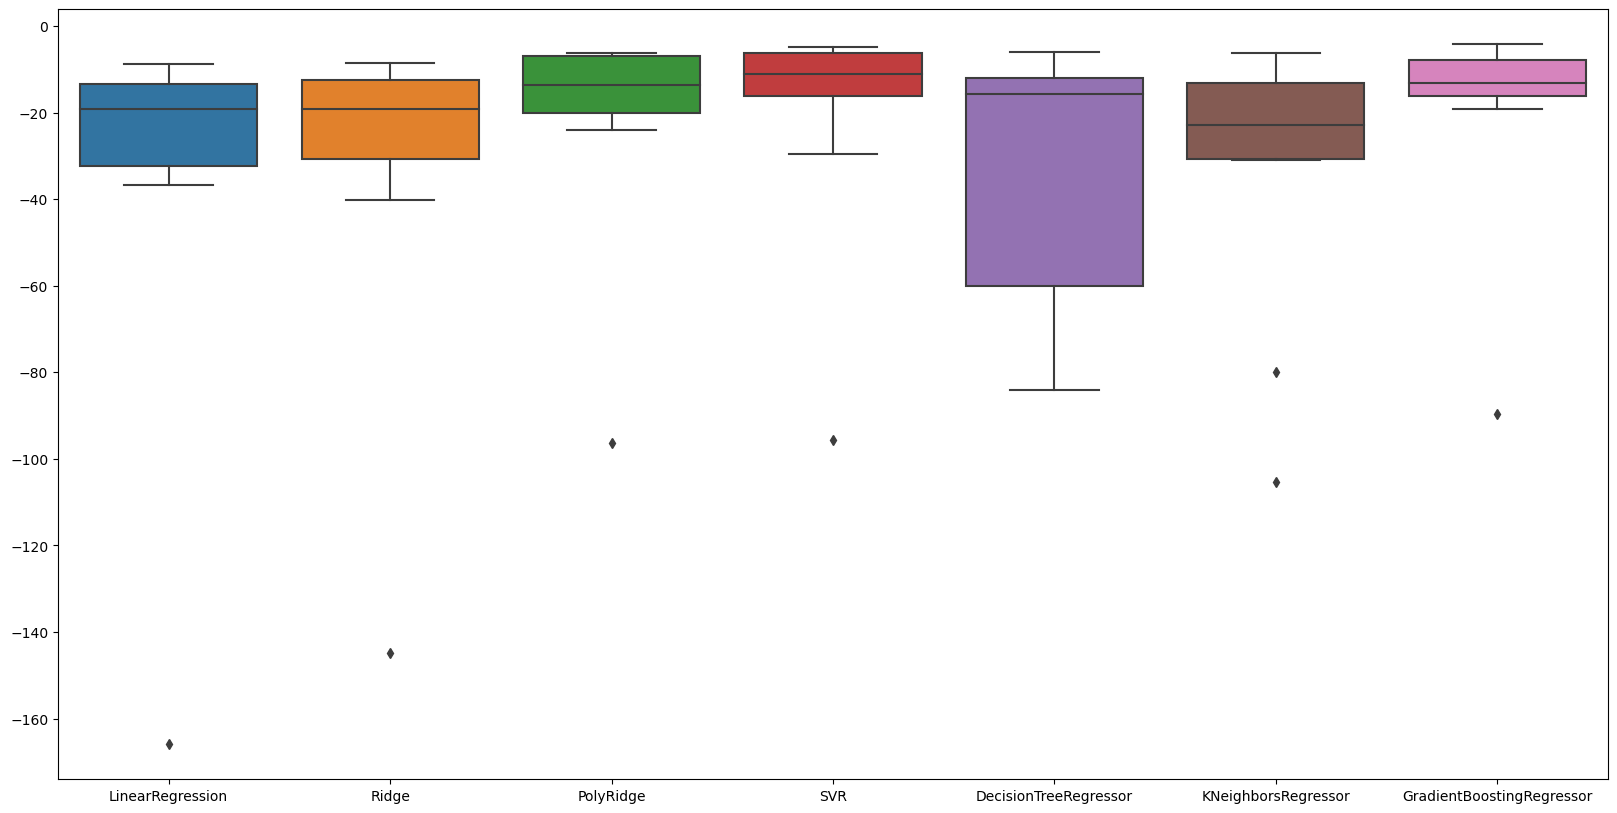

In [ ]:
plt.figure(figsize=(20, 10))
scores_map = pd.DataFrame(scores_map)
sns.boxplot(data=scores_map)

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

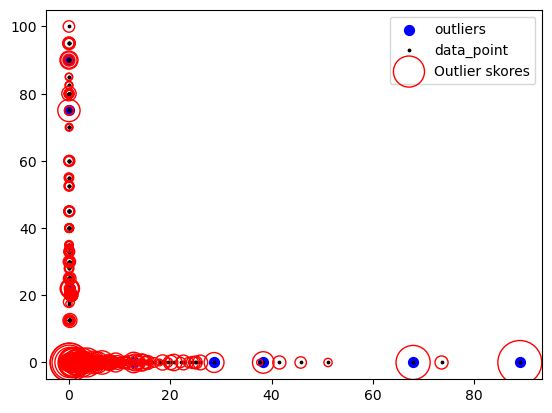

In [ ]:
x=housing.drop(['RM'],axis=1)
y=housing.RM
columns=x.columns.tolist()

clf=LocalOutlierFactor()
y_pred=clf.fit_predict(x)
x_score=clf.negative_outlier_factor_
outlier_score=pd.DataFrame()
outlier_score['MEDV']=x_score
threshold_outliers=-1.5
filters=outlier_score['MEDV']<threshold_outliers
outlier_index=outlier_score[filters].index.tolist()

plt.figure()
plt.scatter(x.iloc[outlier_index,0],x.iloc[outlier_index,1],color='blue',s=50,label='outliers')
plt.scatter(x.iloc[:,0]
           ,x.iloc[:,1],color='k',s=3,label='data_point')
radius=(x_score.max()-x_score)/(x_score.max()-x_score.min())
outlier_score['AGE']=radius
plt.scatter(x.iloc[:,0],x.iloc[:,1],s=1000*radius,edgecolors='r',facecolor='none',label='Outlier skores')
plt.legend()
plt.show();

In [ ]:
x = x.drop(outlier_index)
y = y.drop(outlier_index).values

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[-0.45631473,  0.25892103, -1.2603441 , ...,  0.40368627,
        -1.04887797,  0.14118764],
       [-0.45337238, -0.50392744, -0.55077336, ...,  0.40368627,
        -0.45948629, -0.12681008],
       [-0.45337518, -0.50392744, -0.55077336, ...,  0.35836577,
        -1.18347463,  1.3360108 ],
       ...,
       [-0.44868339, -0.50392744,  0.17370434, ...,  0.40368627,
        -0.95536871,  0.13002107],
       [-0.44183845, -0.50392744,  0.17370434, ...,  0.36526963,
        -0.83635693, -0.08214379],
       [-0.45055478, -0.50392744,  0.17370434, ...,  0.40368627,
        -0.63800396, -1.20996752]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(x_train.shape, x_test.shape, y_test.shape, y_train.shape)

(372, 13) (94, 13) (94,) (372,)


In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
labels = housing['TAX']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.10,random_state=2)
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
reg.score(x_test,y_test)

0.721195424169369

In [ ]:
from sklearn import ensemble
clf=ensemble.GradientBoostingRegressor(n_estimators=400, max_depth=5, min_samples_split=2,
        learning_rate=0.2, loss='squared_error')
reg = GradientBoostingRegressor(random_state=0)

In [ ]:
reg.fit(x_train, y_train)


GradientBoostingRegressor(random_state=0)

In [ ]:
reg.predict(x_test[1:2])


array([6.79768269])

In [ ]:
reg.score(x_test, y_test)

0.7254561183066667